<a href="https://colab.research.google.com/github/Uniholder/Specialization-Yandex-MIPT/blob/main/6_Final_projects/2_churn_prediction/week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте файлы [на странице задания] и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
!mkdir data
!wget -O data/orange_small_churn_data.train https://stepik.org/media/attachments/lesson/90608/_847b6cd041836e8fa914243e83d898fb_orange_small_churn_data.train
!wget -O data/orange_small_churn_labels.train https://stepik.org/media/attachments/lesson/90608/_ce5e9e4280a8856218f1886f007de2a4_orange_small_churn_labels.train

--2022-08-11 09:49:46--  https://stepik.org/media/attachments/lesson/90608/_847b6cd041836e8fa914243e83d898fb_orange_small_churn_data.train
Resolving stepik.org (stepik.org)... 13.69.75.239
Connecting to stepik.org (stepik.org)|13.69.75.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23722578 (23M) [application/octet-stream]
Saving to: ‘data/orange_small_churn_data.train’

data/orange_small_c 100%[===================>]  22.62M  13.1MB/s    in 1.7s    

2022-08-11 09:49:49 (13.1 MB/s) - ‘data/orange_small_churn_data.train’ saved [23722578/23722578]

--2022-08-11 09:49:49--  https://stepik.org/media/attachments/lesson/90608/_ce5e9e4280a8856218f1886f007de2a4_orange_small_churn_labels.train
Resolving stepik.org (stepik.org)... 13.69.75.239
Connecting to stepik.org (stepik.org)|13.69.75.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117024 (114K) [application/octet-stream]
Saving to: ‘data/orange_small_churn_labels.train’

data/ora

In [2]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8)

import warnings
warnings.filterwarnings('ignore')

PATH_TO_DATA = 'data'

In [3]:
df_raw = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_data.train'))
df_raw

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,NaN,NaN,NaN,NaN,NaN,938.0,7.0,NaN,NaN,NaN,...,oslk,8xSqDjb,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
39996,NaN,NaN,NaN,NaN,NaN,1750.0,7.0,NaN,NaN,NaN,...,oslk,WUmqPCU,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN
39997,NaN,NaN,NaN,NaN,NaN,1204.0,7.0,NaN,NaN,NaN,...,oslk,pHOw_BK,LM8l689qOp,NaN,ELof,WqMG,RAYp,F2FyR07IdsN7I,am7c,NaN
39998,NaN,NaN,NaN,NaN,NaN,8232.0,14.0,NaN,NaN,NaN,...,oslk,WC7Esaq,LM8l689qOp,NaN,NaN,wX53,RAYp,F2FyR07IdsN7I,NaN,NaN


In [4]:
num_vars = df_raw.columns[:190]
cat_vars = df_raw.columns[190:]

In [5]:
labels = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_labels.train'), header=None, squeeze=True)
labels

0       -1
1       -1
2       -1
3        1
4       -1
        ..
39995   -1
39996   -1
39997   -1
39998   -1
39999   -1
Name: 0, Length: 40000, dtype: int64

In [6]:
df_raw['target'] = labels

Удалим полностью NaN колонки

In [7]:
df = df_raw.dropna(axis=1, how='all')

2\. Рассчитайте доли классов `отток` и `не отток`.

Абсолютные значения:

In [8]:
labels.value_counts()

-1    37024
 1     2976
Name: 0, dtype: int64

Доли классов:

In [9]:
labels.value_counts(normalize=True) * 100

-1    92.56
 1     7.44
Name: 0, dtype: float64

- отток: 7,4%
- не отток: 92,6%

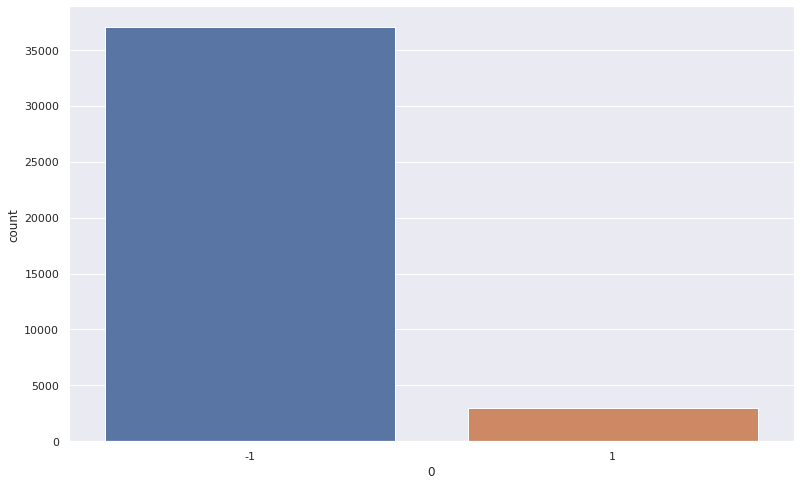

In [10]:
sns.countplot(x=labels);

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://stepik.org/lesson/90035/step/3?unit=66281 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 213 entries, Var1 to target
dtypes: float64(173), int64(2), object(38)
memory usage: 65.0+ MB


Доп анализ: пропущенные значения

In [12]:
not_nans = df.describe().loc['count'].sort_values()

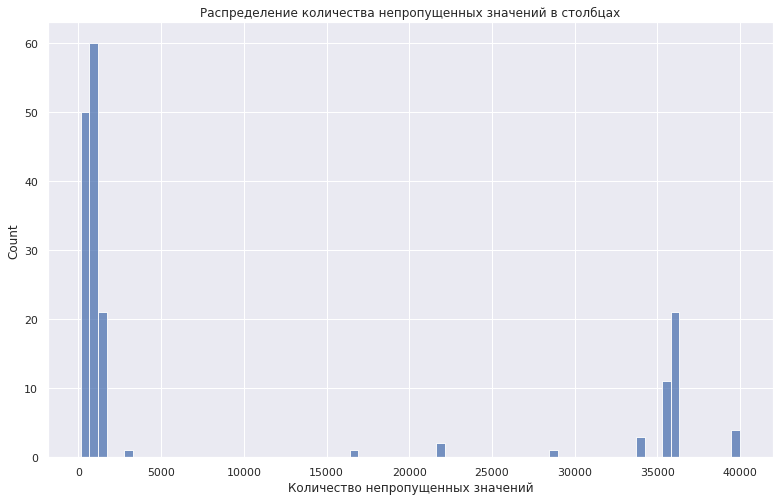

In [13]:
sns.histplot(not_nans);
plt.title('Распределение количества непропущенных значений в столбцах')
plt.xlabel('Количество непропущенных значений');

In [14]:
not_nans.median(), not_nans.mean()

(1006.0, 9242.965714285714)

Построим boxplot'ы для 10 столбцов с максимальным количеством NaN'ов

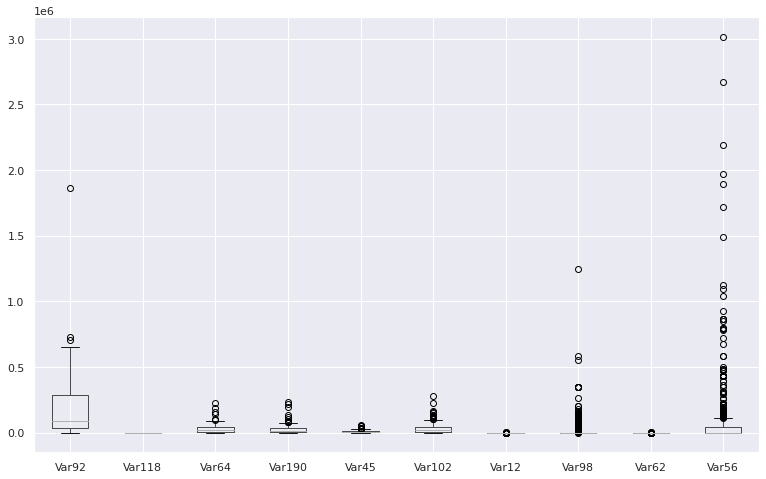

In [15]:
df.boxplot(column=not_nans[:10].index.to_list());

Построим boxplot'ы для 10 столбцов с минимальным количеством NaN'ов

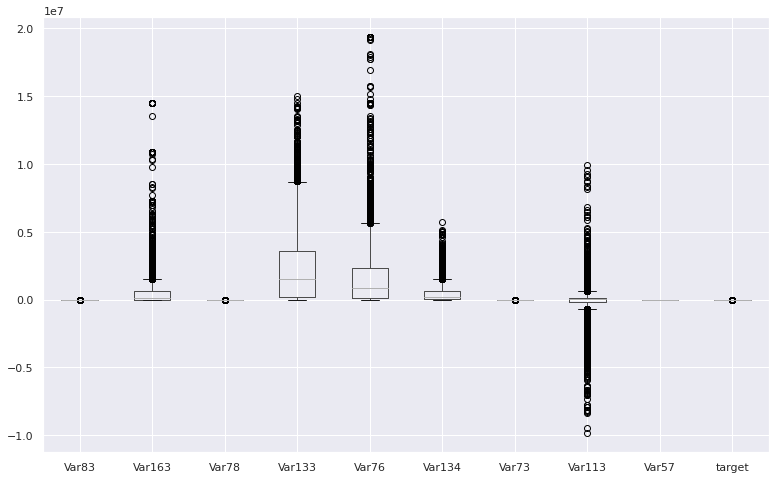

In [16]:
df[not_nans[-10:].index].boxplot();

Пример одного столбца с разбиением по целевой переменной

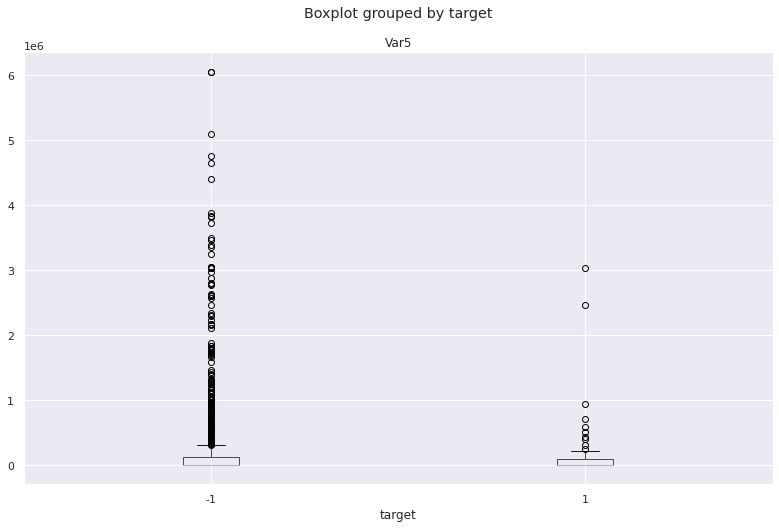

In [17]:
df.boxplot(column=['Var5'], by='target');

Для расчёта корреляции непрерывных признаков с бинарной целевой переменной используем следующий подход: раcсчитаем средние значения в каждом столбце с учётом значения целевой переменной.

Далее сравним средние значения и разность будем считать величиной корреляции.

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
df_scaled_num = pd.DataFrame(scaler.fit_transform(df_raw[num_vars]), columns=num_vars)
df_scaled_num

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190
0,NaN,NaN,NaN,NaN,NaN,0.023163,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.013760,0.2,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.424528,NaN
2,NaN,NaN,NaN,NaN,NaN,0.014822,0.2,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.011635,0.2,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.005206,0.2,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,NaN,NaN,NaN,NaN,NaN,0.007119,0.2,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650943,NaN
39996,NaN,NaN,NaN,NaN,NaN,0.013282,0.2,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39997,NaN,NaN,NaN,NaN,NaN,0.009138,0.2,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39998,NaN,NaN,NaN,NaN,NaN,0.062477,0.4,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.433962,NaN


In [21]:
df_scaled_num['target'] = labels
means = df_scaled_num.groupby('target').mean()
means

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190
target,,,,,,,,,,,,,,,,,,,,,
-1,0.020338,0.001036,0.003338,0.005464,0.041708,0.010138,0.197824,NaN,0.020488,0.030543,...,0.012429,0.117058,0.026271,0.007308,NaN,0.034744,0.017463,0.266603,0.420790,0.099687
1,0.023454,0.000000,0.002054,0.006061,0.030639,0.008579,0.149071,NaN,0.023081,0.038798,...,0.012857,0.111921,0.031042,0.010049,NaN,0.030252,0.020408,0.352573,0.357583,0.077047


In [22]:
corrs = (means.loc[1] - means.loc[-1])
corrs

Var1      0.003117
Var2     -0.001036
Var3     -0.001284
Var4      0.000596
Var5     -0.011069
            ...   
Var186   -0.004492
Var187    0.002945
Var188    0.085971
Var189   -0.063207
Var190   -0.022640
Length: 190, dtype: float64

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [23]:
top_correlated_pos = corrs.sort_values(ascending=False)[:20]
top_correlated_pos

Var188    0.085971
Var130    0.082077
Var114    0.056624
Var111    0.053231
Var126    0.052066
Var177    0.046964
Var139    0.035498
Var53     0.035076
Var69     0.025657
Var51     0.024035
Var36     0.023968
Var131    0.023395
Var180    0.022413
Var19     0.022106
Var87     0.016956
Var86     0.016743
Var161    0.015872
Var152    0.013819
Var77     0.012490
Var150    0.011893
dtype: float64

In [24]:
top_correlated_neg = corrs.sort_values(ascending=True)[:20]
top_correlated_neg

Var189   -0.063207
Var73    -0.053928
Var7     -0.048753
Var168   -0.045693
Var142   -0.034268
Var92    -0.030872
Var144   -0.028946
Var147   -0.028191
Var136   -0.025407
Var110   -0.024166
Var59    -0.024000
Var190   -0.022640
Var100   -0.021228
Var89    -0.017645
Var72    -0.017351
Var14    -0.016809
Var93    -0.016290
Var45    -0.016099
Var11    -0.015383
Var178   -0.014427
dtype: float64

In [25]:
top_correlated = abs(corrs).sort_values(ascending=False)[:20]
top_correlated

Var188    0.085971
Var130    0.082077
Var189    0.063207
Var114    0.056624
Var73     0.053928
Var111    0.053231
Var126    0.052066
Var7      0.048753
Var177    0.046964
Var168    0.045693
Var139    0.035498
Var53     0.035076
Var142    0.034268
Var92     0.030872
Var144    0.028946
Var147    0.028191
Var69     0.025657
Var136    0.025407
Var110    0.024166
Var51     0.024035
dtype: float64

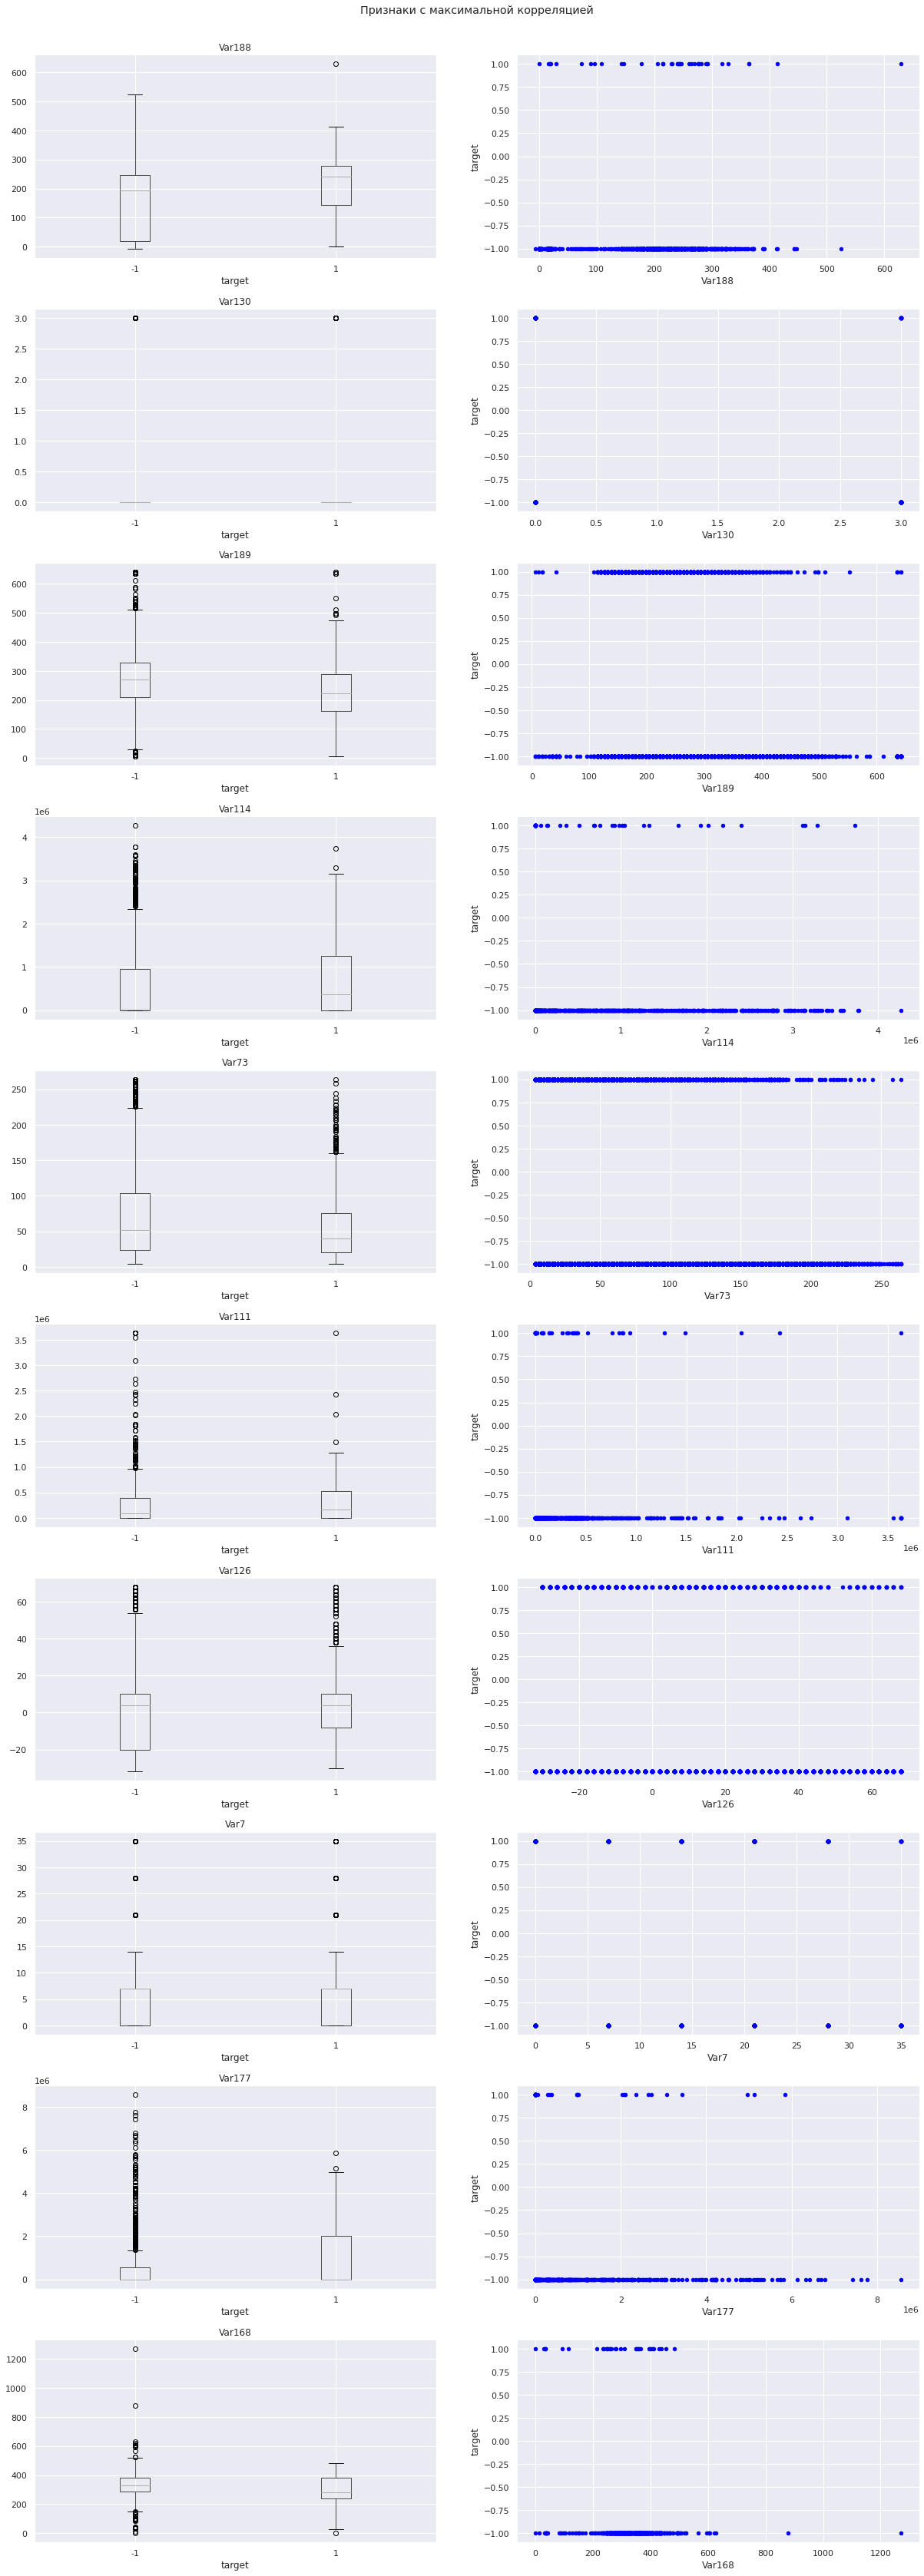

In [26]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 60))
fig.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col = top_correlated.index.to_list()[i]
    df.boxplot(column=col, by='target', ax=ax[0])
    df.plot.scatter(x=col, y='target', ax=ax[1], color='blue')
fig.suptitle('Признаки с максимальной корреляцией', y=0.915);

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [27]:
num_vars_nna = [i for i in df.columns if i in num_vars]
cat_vars_nna = [i for i in df.columns if i in cat_vars]

In [28]:
import random

random_10 = random.sample(num_vars_nna, 10)
random_correlated = abs(corrs)[random_10]

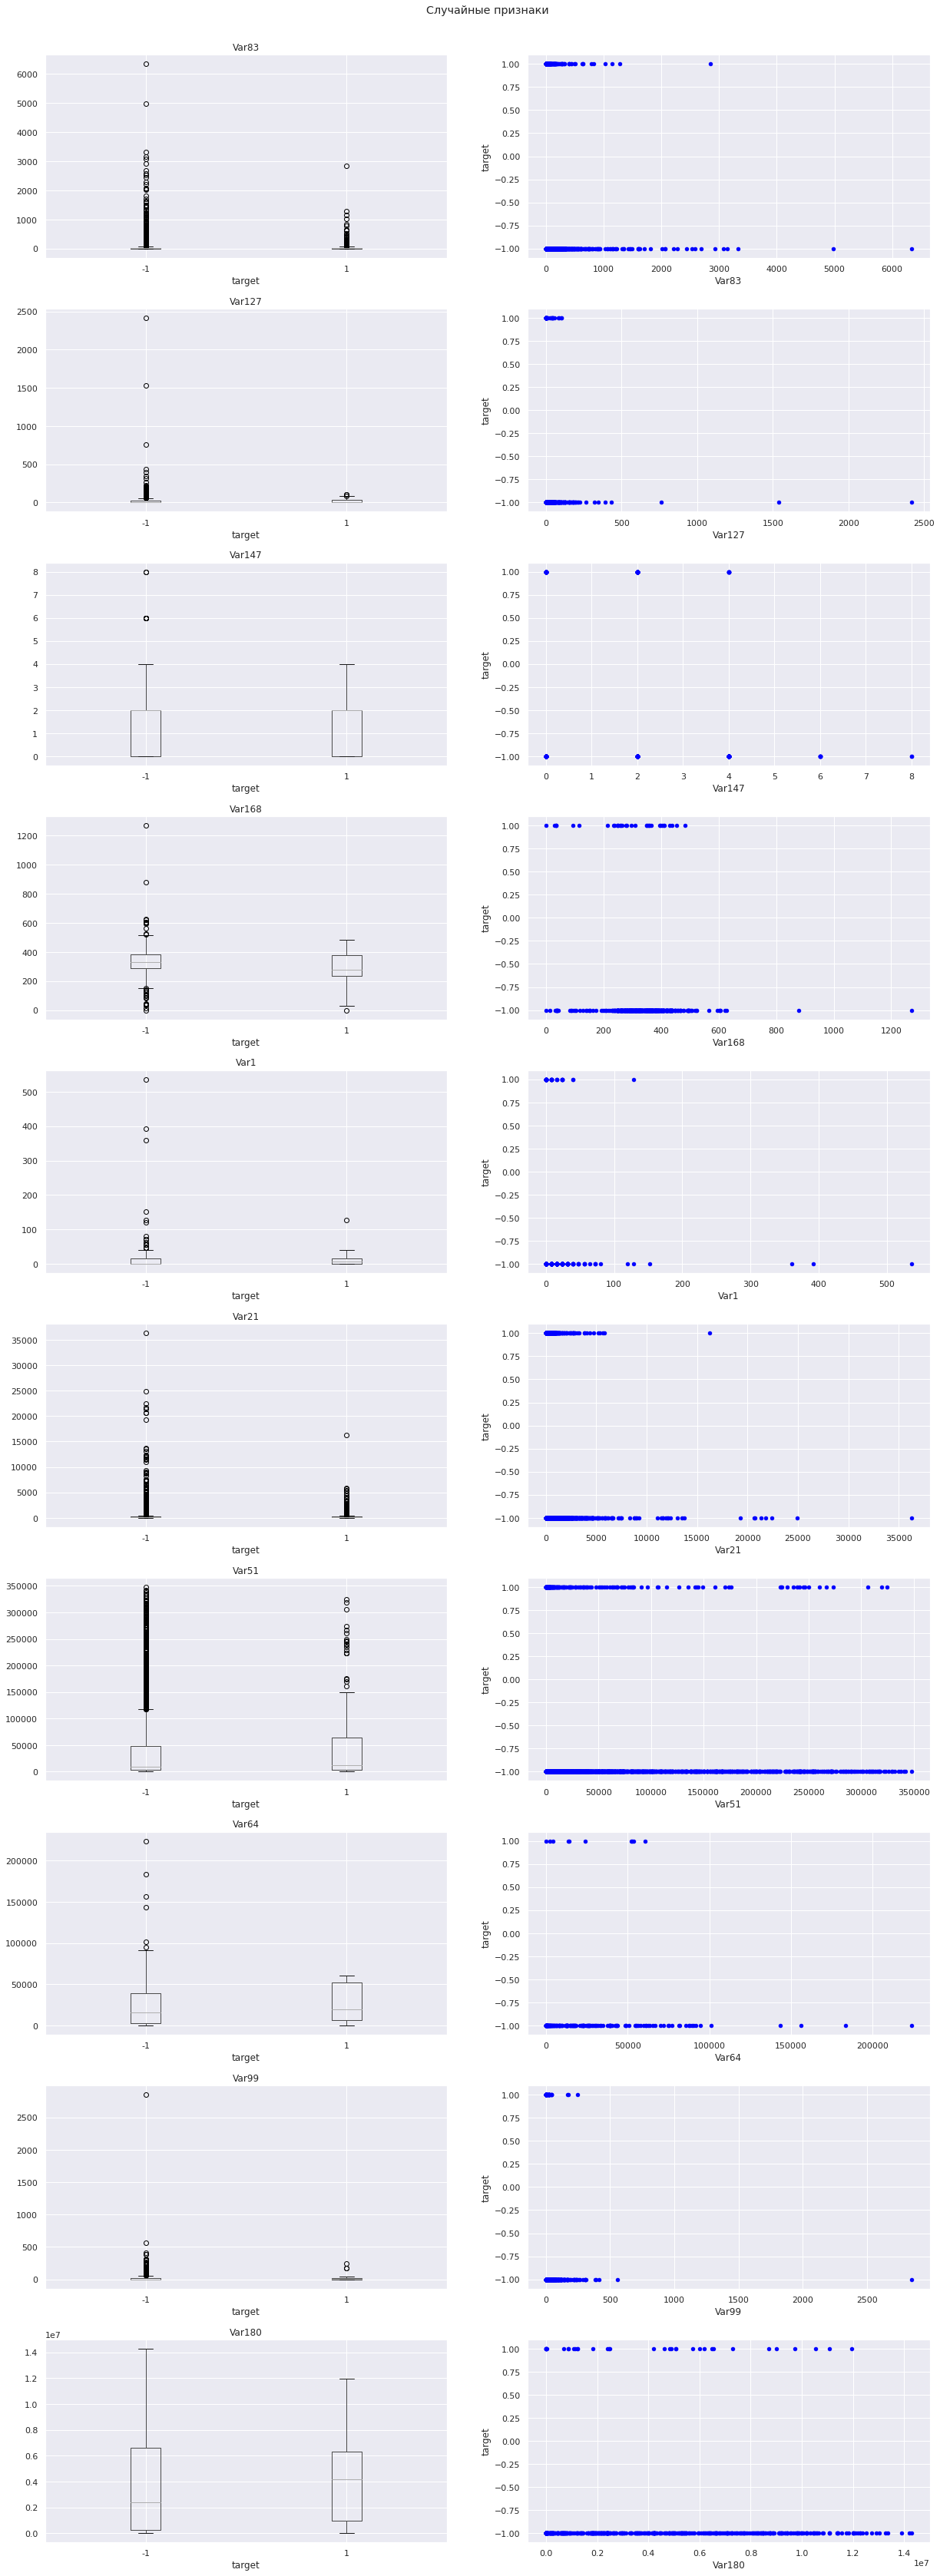

In [29]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 60))
fig.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col = random_correlated.index.to_list()[i]
    df.boxplot(column=col, by='target', ax=ax[0])
    df.plot.scatter(x=col, y='target', ax=ax[1], color='blue');
fig.suptitle('Случайные признаки', y=0.915);

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [30]:
least_correlated = corrs[num_vars_nna].abs().sort_values()[:10]
least_correlated

Var118    0.000000
Var123    0.000007
Var44     0.000024
Var129    0.000081
Var83     0.000154
Var105    0.000231
Var104    0.000231
Var112    0.000324
Var109    0.000390
Var181    0.000428
dtype: float64

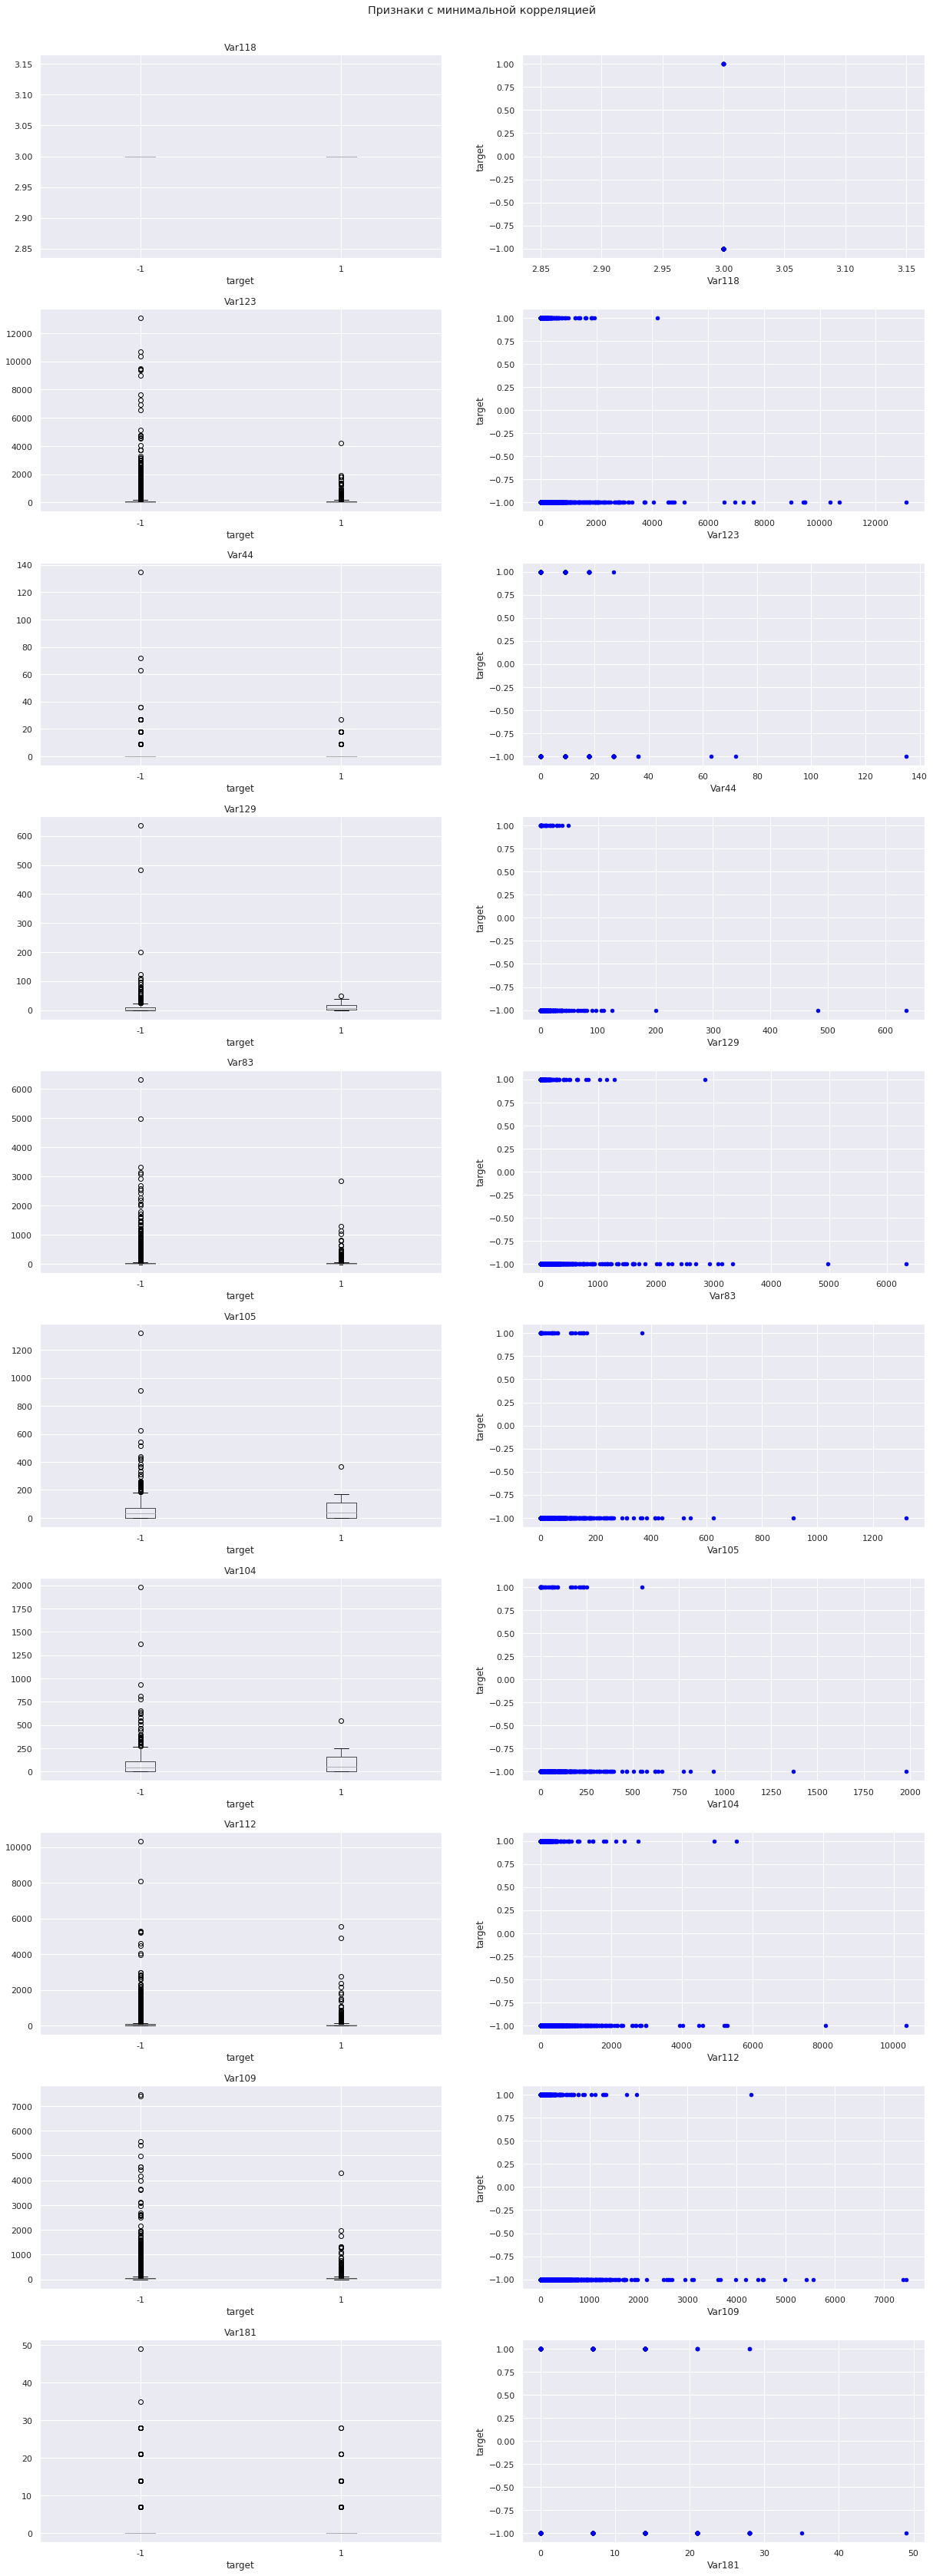

In [31]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 60))
fig.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col = least_correlated.index.to_list()[i]
    df.boxplot(column=col, by='target', ax=ax[0])
    df.plot.scatter(x=col, y='target', ax=ax[1], color='blue');
fig.suptitle('Признаки с минимальной корреляцией', y=0.915);

Доп анализ: частота значений в столбцах

In [32]:
stats_num = pd.DataFrame(columns=['max_freq_value', 'frequency'])
for col in df[num_vars_nna].columns:
    stats_num.loc[col] = [df[num_vars_nna][col].value_counts().index[0], df[num_vars_nna][col].value_counts().iloc[0]]

In [33]:
# самые частые значения в каждом столбце
stats_num.sort_values(by='frequency', ascending=False)

,max_freq_value,frequency
Var173,0.00,35878.0
Var143,0.00,35668.0
Var44,0.00,35446.0
Var181,0.00,33578.0
Var35,0.00,32979.0
...,...,...
Var64,12960.00,4.0
Var102,0.00,4.0
Var190,0.00,4.0
Var45,2985.64,2.0


In [36]:
# сколько фичей с самыми частыми значениями
stats_num['max_freq_value'].value_counts()

0.000000        149
7.000000          3
3.000000          3
9.000000          2
8.000000          2
2.000000          2
6.000000          2
166.560000        1
5.000000          1
2985.640000       1
2.463576          1
12960.000000      1
8225.000000       1
32.000000         1
4.000000          1
247.840000        1
15.600000         1
282.000000        1
Name: max_freq_value, dtype: int64

In [ ]:
# суммарные количества наиболее частых значений по всем фичам
stats_num.groupby('max_freq_value').sum().sort_values('frequency', ascending=False)

,frequency
max_freq_value,
0.000000,457558.0
-1.000000,37024.0
9.000000,34854.0
7.000000,19462.0
3.000000,16788.0
32.000000,8655.0
4.000000,7288.0
166.560000,5727.0
8.000000,2227.0


In [37]:
stats_num['n_uniques'] = df.nunique()
stats_num['notna'] = df.notna().sum()

In [38]:
stats_num.sort_values('n_uniques')[:20]

,max_freq_value,frequency,n_uniques,notna
Var118,3.0,140.0,1,140
Var27,0.0,1150.0,2,1165
Var130,0.0,839.0,2,1005
Var90,0.0,568.0,2,570
Var29,0.0,565.0,2,570
Var138,0.0,1274.0,2,1275
Var67,0.0,1160.0,2,1165
Var116,0.0,556.0,2,570
Var2,0.0,1005.0,2,1006
Var49,0.0,993.0,3,1006


In [40]:
stats_num.sort_values('n_uniques', ascending=False)[:20]

,max_freq_value,frequency,n_uniques,notna
Var113,0.000000,755.0,38902,40000
Var81,0.000000,555.0,34545,35565
Var133,0.000000,3086.0,30306,35984
Var153,0.000000,1800.0,29785,35984
Var134,0.000000,5340.0,26813,35984
Var38,0.000000,7527.0,24997,35984
Var76,0.000000,5682.0,24081,35984
Var57,2.463576,9.0,23022,40000
Var163,0.000000,10786.0,18737,35984
Var94,0.000000,413.0,16656,22063


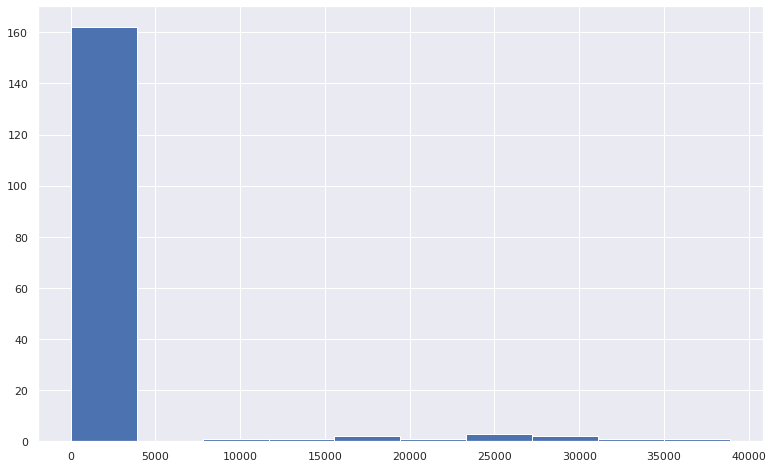

In [41]:
stats_num['n_uniques'].hist();

In [42]:
stats_num = pd.concat([stats_num, df[num_vars_nna].describe().T], axis=1)

In [43]:
stats_num

,max_freq_value,frequency,n_uniques,notna,count,mean,std,min,25%,50%,75%,max
Var1,0.0,312.0,17,570,570.0,11.003509,34.952792,0.00,0.000,0.00,16.00,536.00
Var2,0.0,1005.0,2,1006,1006.0,0.004970,0.157642,0.00,0.000,0.00,0.00,5.00
Var3,0.0,804.0,129,1005,1005.0,429.328358,4470.405915,0.00,0.000,0.00,0.00,130668.00
Var4,0.0,1258.0,4,1275,1275.0,0.148235,1.396054,0.00,0.000,0.00,0.00,27.00
Var5,0.0,706.0,444,1165,1165.0,249055.515021,676202.052802,0.00,0.000,0.00,117215.00,6048550.00
...,...,...,...,...,...,...,...,...,...,...,...,...
Var186,0.0,423.0,13,570,570.0,3.515789,9.412473,0.00,0.000,0.00,6.00,102.00
Var187,0.0,187.0,49,570,570.0,16.056140,54.965050,0.00,0.000,4.00,14.00,910.00
Var188,15.6,41.0,455,1006,1006.0,165.108310,113.400173,-6.42,19.380,196.41,250.98,628.62
Var189,282.0,503.0,95,16785,16785.0,270.585523,86.723561,6.00,204.000,270.00,330.00,642.00


7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [45]:
df[cat_vars_nna]

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,...,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
0,NaN,NESt0G8EIb,AERks4l,NaN,taul,1K8T,0LaQ,UaKK0yW,I1sFbv_0IT,NaN,...,hLKtJ9p,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN
1,NaN,P1WvyxLp3Z,2Knk1KF,NaN,taul,1K8T,YFAj,Bnunsla,o64y9zI,DlISMzi,...,hN8KpA1,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86
2,NaN,FoxgUHSK8h,LrdZy8QqgUfkVShG,NaN,taul,1K8T,TyGl,fhk21Ss,nQUveAzAF7,NaN,...,4UxGlow,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86
3,NaN,vNEvyxLp3Z,RO12,NaN,taul,1K8T,0Xwj,uoZk2Zj,LWyxgtXeJL,NaN,...,ylCK5YS,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
4,NaN,4e7gUH7IEC,RO12,NaN,taul,1K8T,vSNn,kugYdIL,ZIXKpoNpqq,NaN,...,PYpzAu9,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,NaN,IXSgUHShse,RO12,SEuy,taul,1K8T,JLbT,qMlD1gf,CdPgMY1Z52,IjmTVSM,...,U8IVcJ1,oslk,8xSqDjb,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86
39996,NaN,tr0gUH7ejg,RO12,NaN,taul,1K8T,lK27,Wtcr3WP,qzIoq9b,NaN,...,5ZxD5lR,oslk,WUmqPCU,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN
39997,NaN,C2Dvyx875g,RO12,NaN,taul,1K8T,487l,FZVtMxl,LH0kFz12FM,hDyVP2J,...,B9vNioI,oslk,pHOw_BK,LM8l689qOp,NaN,ELof,WqMG,RAYp,F2FyR07IdsN7I,am7c
39998,NaN,dTGmfo8zhV,RO12,NaN,taul,1K8T,487l,gRinF0C,e1XhvTunuD,NaN,...,SCnYWu3,oslk,WC7Esaq,LM8l689qOp,NaN,NaN,wX53,RAYp,F2FyR07IdsN7I,NaN


In [48]:
df[cat_vars_nna].describe()

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,...,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
count,871,39709,40000,10190,40000,40000,39877,40000,39996,19634,...,40000,40000,40000,35804,662,19065,40000,40000,40000,17223
unique,1,354,50,3,23,4,220,3891,4400,13297,...,3891,7,3891,4,1,3,23,7,30,4
top,r__I,1GdOj1KXzC,RO12,SEuy,taul,1K8T,0Xwj,fhk21Ss,r83_sZi,yP09M03,...,4UxGlow,oslk,catzS2D,LM8l689qOp,4n2X,ELof,FSa2,RAYp,F2FyR07IdsN7I,am7c
freq,871,313,28817,10015,38353,39633,3688,3557,746,51,...,3557,29610,3557,29279,662,8875,6403,28112,26211,9312


In [46]:
stats_cat =  df[cat_vars_nna].describe().T
stats_cat.sort_values('freq', ascending=False)

,count,unique,top,freq
Var196,40000,4,1K8T,39633
Var195,40000,23,taul,38353
Var210,40000,6,uKAI,38084
Var208,39877,2,kIsH,36823
Var203,39877,5,9_Y1,36192
Var211,40000,2,L84s,32215
Var219,35804,22,FzaX,32191
Var221,40000,7,oslk,29610
Var223,35804,4,LM8l689qOp,29279
Var193,40000,50,RO12,28817


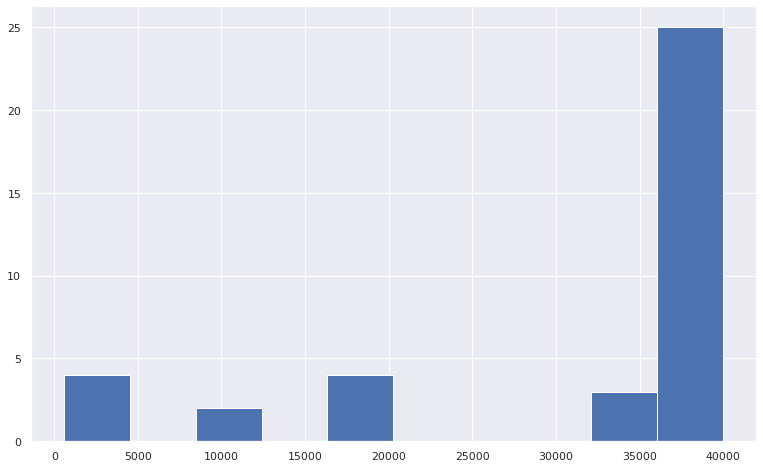

In [49]:
stats_cat['count'].hist();

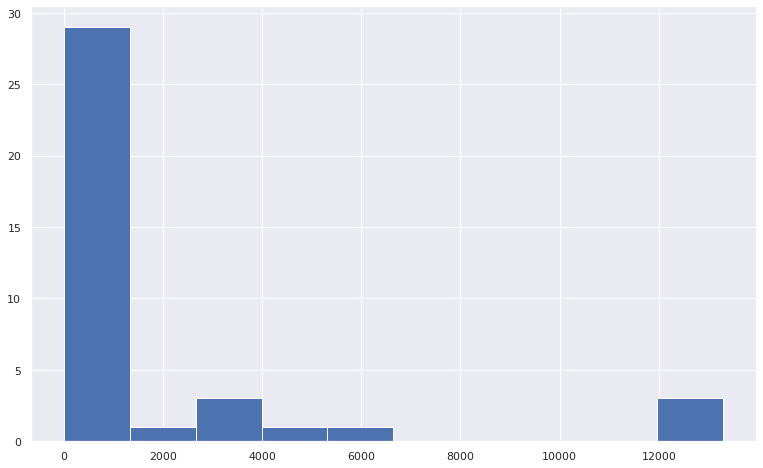

In [50]:
stats_cat['unique'].hist();

In [51]:
def cramers_v(x, y):
    '''
    V Крамера (корреляция категориальных признаков)
    '''
    import scipy.stats as ss

    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)

    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [52]:
cat_corrs = pd.Series()
for col in df[cat_vars_nna].columns:
    corr = cramers_v(df[col], df.target)
    if not np.isnan(corr):
        cat_corrs.loc[col] = corr
stats_cat['target_corr'] = cat_corrs

In [58]:
cat_corrs = pd.Series()
for col in df[cat_vars_nna].columns:
    corr = cramers_v(df[col].fillna('na'), df.target)
    if not np.isnan(corr):
        cat_corrs.loc[col] = corr
stats_cat['target_corr_with_na'] = cat_corrs

In [59]:
stats_cat.sort_values('target_corr', ascending=False)

,count,unique,top,freq,target_corr,target_corr_with_na
Var199,39996,4400,r83_sZi,746,0.237375,0.237329
Var192,39709,354,1GdOj1KXzC,313,0.116264,0.118431
Var216,40000,1819,mAjbk_S,3929,0.083442,0.083442
Var206,35565,21,IYzP,13854,0.077436,0.081911
Var212,40000,78,NhsEn4L,23433,0.075150,0.075150
Var205,38453,3,VpdQ,25612,0.073484,0.072040
Var228,40000,30,F2FyR07IdsN7I,26211,0.070617,0.070617
Var193,40000,50,RO12,28817,0.060861,0.060861
Var207,40000,14,me75fM6ugJ,28047,0.055418,0.055418
Var227,40000,7,RAYp,28112,0.054255,0.054255


In [60]:
pd.crosstab(df['target'], df['Var205'])

Var205,09_Q,VpdQ,sJzTlal
target,,,
-1,8606,23875,3125
1,626,1737,484


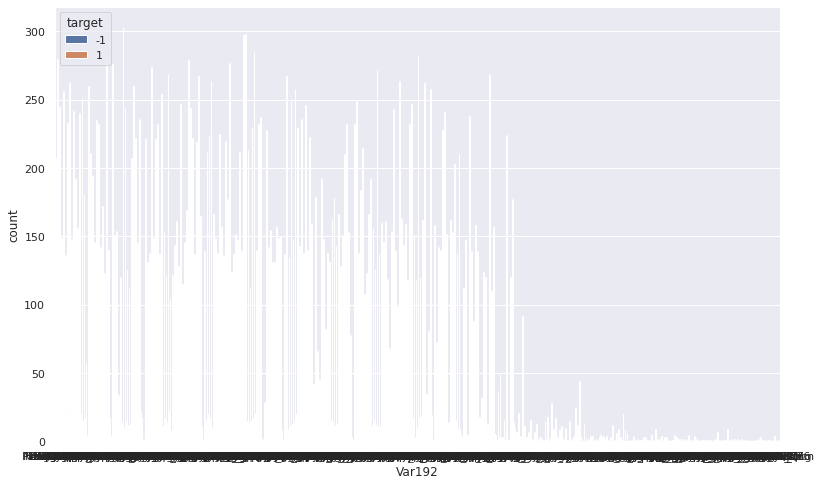

In [62]:
sns.countplot(x='Var192', hue='target', data=df[cat_vars_nna + ['target']]);

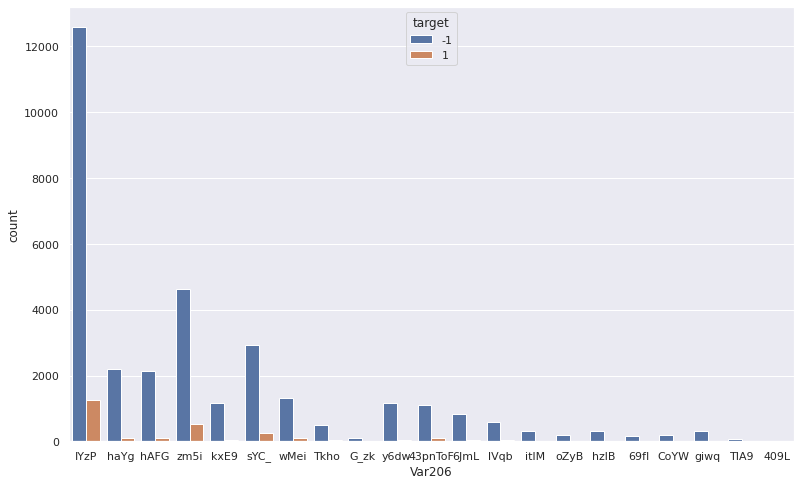

In [64]:
sns.countplot(x='Var206', hue='target', data=df[cat_vars_nna + ['target']]);

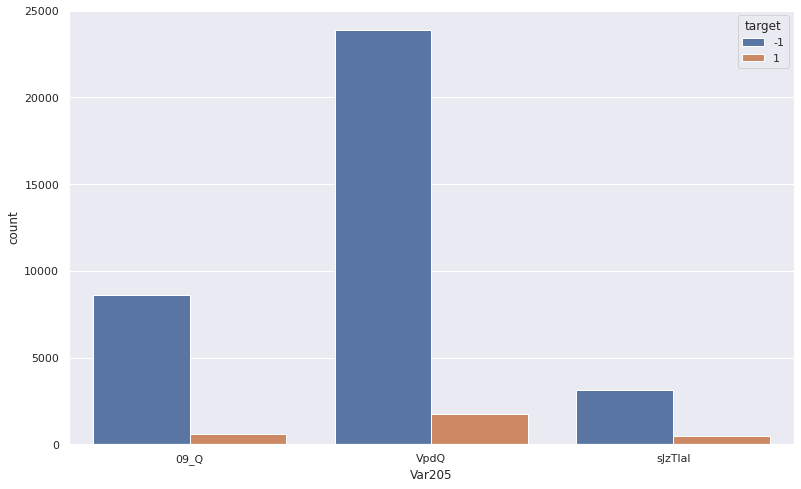

In [65]:
sns.countplot(x='Var205', hue='target', data=df[cat_vars_nna + ['target']]);

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Были проанализированы числовые и категориальные переменные.
Целевой класс несбалансрован. Значений Отток гораздо меньше значения Не отток.
У признаков имеются пропуски: незаполненные значения. Число NaN'ов варьируется.
Числовые: большинство имеют около 1000 значений.
149 призанков имеют наиболее частое значение 0. Всего 0 встречается 457558 раз. Вероятно 0 - отсутствие значения.
Большинство имеют меньше 5000 уникальных значений.
Категориальные: большинство имеют почти 40000 непропущенных значений. Уникальных значение - до 1000.

Наибольшее влияние могут оказать признаки с максимальными значениями корреляции с целевой переменной.

Признаки с полностью отсутствующими значениями можно убрать, так как они не несут никакой информации.
Признаки с очень малым количеством значений также стоит убрать, если не получится придумать подходящую стратегию замены NaN'ов.
Признаки с единственным уникальным значением также можно отнести к шумовым.
Признаки с наименьшими значениями корреляции с целевым признаком - аналогично.

Отбор шумовых признаков может привести к улучшению качества модели.